/root/anaconda3/envs/my_env395/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


3364
the number of abstracts: 484
the number of lines: 3363
the number of sentences: 3363
{'1': 1095, '2': 620, '3': 768, '4': 758, '5': 14, '6': 59, '3+4': 27, '1+2': 1, '2+3': 21}


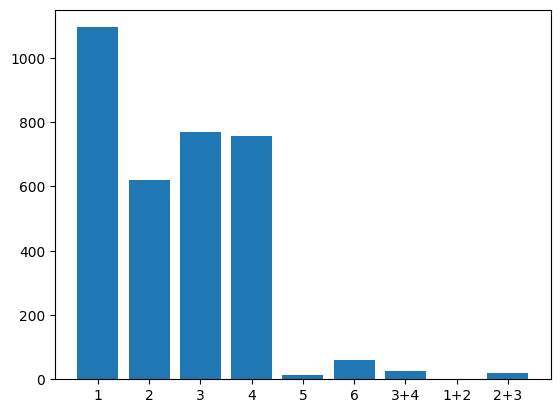

In [1]:
'''
	excel(.xlsx) to text(.txt)

	text format:
		ABS 1 - Line A
		ABS 1 - Line B
		...
		<Abstract Seperator>
		ABS 2 - ...
		...
		...
		<Abstract Seperator>

	Line format:
		Sentence'\t'label
'''

from openpyxl import load_workbook

FN_EXCEL = 'acl_2021.xlsx'
FN_TEXT  = 'total_acl_2021.txt'

load_wb = load_workbook(FN_EXCEL, data_only=True)
load_ws = load_wb['ACL 2021']

m_row = load_ws.max_row
print(m_row)

liens_to_text = list()
sentence_cnt_dict = dict()
tag_cnt_dict = dict()
prev_idx_abs = 2
cnt_abs = 1
cnt_lines = 0
# keep reaading cells
for row in range(2, m_row + 1):
	idx_abs = load_ws.cell(row, 1).value
	sentence = load_ws.cell(row, 4).value
	tag = load_ws.cell(row, 5).value.split('.')[0]

	if sentence_cnt_dict.get(sentence) == None:
		sentence_cnt_dict[sentence] = 0
	sentence_cnt_dict[sentence] += 1
	
	if tag_cnt_dict.get(tag) == None:
		tag_cnt_dict[tag] = 0
	tag_cnt_dict[tag] += 1

	if prev_idx_abs != idx_abs:
		prev_idx_abs = idx_abs
		cnt_abs += 1
		liens_to_text.append('----------\n')
		
	line = sentence + '\t' + tag + '\n'
	liens_to_text.append(line)
	cnt_lines += 1

liens_to_text.append('----------\n')

print('the number of abstracts:', cnt_abs)
print('the number of lines:', cnt_lines)
print('the number of sentences:', len(sentence_cnt_dict))
print(tag_cnt_dict)

with open(FN_TEXT, 'w', encoding='utf-8') as wf:
	wf.writelines(liens_to_text)

import matplotlib.pyplot as plt
plt.bar(tag_cnt_dict.keys(), tag_cnt_dict.values())
plt.show()